# Lab 1 - Logistic Regression
## Trại hè Toán và Khoa học MaSSP
Trong lab này, chúng ta sẽ học cách dùng logistic regression để phân loại 2 nhóm chữ số viết tay "0" và "1".

Cách viết code trong Phần 1 dựa vào công thức đã học trong bài giảng về logistic regression, đặc biệt dành cho trường hợp có 2 nhóm cần phân loại.

Cách viết code trong Phần 2 chỉ thay đổi một chút cách tính hàm loss function, chiều của tensor, nhưng có thể áp dụng cho phân loại nhiều hơn 2 nhóm.

Phần bài tập sẽ là thay đổi code và thông số của Phần 2 để có thể phân loại tất cả 10 nhóm chữ số viết tay từ "0" đến "9" với độ chính xác cao.

# 1. Logistic Regression cho 2 nhóm
## 1.1 Tóm tắt
<b>0. Lấy dữ liệu cho training set và test set</b>

Sử dụng MNIST dataset có thể download qua thư viện TensorFlow, lọc ra các hình ảnh của chữ số "0" và "1".

<b>1. Tính output</b>

Thay $\theta$ bằng $W$, $\theta_0$ bằng $b$. Các giá trị ban đầu của $W$ và $b$ gán bằng 0.
$$z = x* W + b$$

$$y = sigmoid(z) = \frac{1}{1 + exp(-z)}$$  

<b>2. Tính loss function, so sánh output với label chuẩn</b>

$$cost = -\frac{1}{m}(y\_correct*log(y) + (1-y\_correct)*log(1-y))$$

<b>3. Dùng Gradient descent để điều chỉnh $W$ và $b$ sao cho $cost$ nhỏ nhất</b>

Sử dụng hàm $GradientDescentOptimizer$ của TensorFlow!

<b>4. Lặp lại các bước 1-3 cho đến khi đạt được độ chính xác mong muốn</b>

* Training error: tỉ lệ phân loại sai trong training set
* Test error: tỉ lệ phân loại sai trong test set

## 1.2 Tải dữ liệu
MNIST dataset chứa các ảnh của các chữ số viết tay có kích thước 28x28.

In [99]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist 

In [100]:
from tensorflow.examples.tutorials.mnist import input_data

Hàm $read_data_sets$ dùng để tải dữ liệu, tùy vào arguments mà format của dữ liệu sẽ khác nhau. Ví dụ nếu ta đặt $one\_hot=True$, thì mỗi label nhận được sẽ có chiều 1x10, với giá trị 1 tại vị trí tương ứng với chữ số đó, và 0 cho các vị trí còn lại. Ví dụ, số "1" sẽ được biếu diễn bởi array sau:
$$[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]$$

Tuy nhiên trong phần 1, chúng ta chỉ làm việc với 2 chữ số "0" và "1", nên chỉ cần label có giá trị 0 ứng với chữ số "0" và giá trị 1 với chữ số "1" là được. Chúng ta thậm chí không cần cung cấp giá trị $one\_hot=False$, vì đây là giá trị default của $one\_hot$ trong hàm $read_data_sets$ rồi.

>Hãy kiểm chính bằng cách tìm hàm $read\_data\_sets$ trong https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist 

In [101]:
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist = input_data.read_data_sets("MNIST_data/")
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000048EE338908>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000048EE338978>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000048EE4045C0>)

Dữ liệu tải về được chứa trong thư mục MNIST_data/ và được load vào $mnist$. $mnist$ chứa 3 Dataset: train, validation, và test. 
>Tìm hiểu thêm về TensorFLow's Dataset class:
https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py 

In [102]:
(train_data, validation_data, test_data) = (mnist.train, mnist.validation, mnist.test)

Mỗi Dataset này đều có $images$ và $labels$, chứa các hình ảnh 28x28 và loại tương ứng (cũng là các số từ 0-9).

>Hãy tìm size của mỗi Dataset.

Hãy lọc ra hình ảnh và label tương ứng của các chữ số "0" và "1" trong training và test set.

In [108]:
#train_images = 
#train_labels = 

#test_images = 
#test_labels = 

Hãy plot hình ảnh đầu tiên trong training set và kiểm tra xem label tương ứng có phù hợp với hình ảnh thu được hay không.

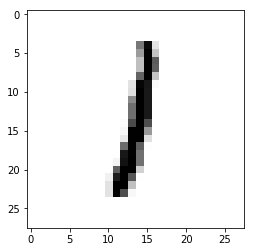

In [156]:
plt.imshow(train_images[0].reshape((28,28)), cmap='Greys')
plt.show()

In [159]:
# Các thay đổi khác nếu cần thiết


## 1.3 Viết chương trình phân loại

### Inputs
Để thể hiện graph trên Tensorboard rõ ràng hơn, hãy định nghĩa các tensors sau trong scope "Inputs":
- $x$: chứa tất cả các ảnh trong training set, $tf.placeholder$ có type là $float32$
- $y\_corect$: chứa labels của các ảnh trong training set, $tf.placeholder$ có type là $float32$
- $W$: chứa các hệ số tương ứng với từng điểm ảnh, $tf.Variable$
- $b$: bias hay $\theta_0$ trong bài giảng, $tf.Variable$

In [161]:
with tf.name_scope("Inputs") as scope:
    #x = tf.placeholder(...)
    #y_correct = tf.placeholder(...)
    #W = tf.Variable(...)
    #b = tf.Variable(...)

### Hypothesis function
Hãy viết công thức tính $y$ dựa vào $W$ và $b$.

$$z = x* W + b$$

$$y = sigmoid(z) = \frac{1}{1 + exp(-z)}$$

Lưu ý $y$ không phải chỉ bao gồm các số 0 và 1 - tương ứng với label "0" và "1", mà là các giá trị số thực từ 0 đến 1. Giá trị càng gần 1 thì khả năng label là "1" càng cao, và giá trị càng gần 0 thì khả năng label là "1" càng thấp (hay nói cách khác khả năng label là "0" càng cao).

In [116]:
with tf.name_scope("Outputs") as scope:
    #y = ...

### Cost function
Hãy viết công thức tính $cost$ thể hiện sai số giữa kết quả dự đoán $y$ và label thật $y\_corect$. Lưu ý rằng giá trị thu được từ operation $cost$ không phải là một array như $y$ hay $y\_correct$ mà là một số thực.

In [138]:
with tf.name_scope("Cost") as scope:
    #cost = ...

### Gradient Descent
Hãy dùng $GradientDescentOptimizer()$ của TensorFlow để viết operation $train\_step$ tương tự như trong lab đầu tiên về TensorFlow.

In [133]:
with tf.name_scope('Train') as scope:
    #train_step = ...

### Evaluate model
Trong quá trình training, chúng ta cần biết độ chính xác của phân loại để điều chỉnh thuật toán và tham số cho phù hợp. Như đã nói ở trên, các giá trị trong $y$ dao động từ 0 đến 1, ta cần quyết định label dự đoán cho mỗi ảnh là 0 hoặc 1 dựa vào các giá trị này.

Hãy viết một operation có thể tính được độ chính xác của một dataset khi cho biết $y$ và label thật $y\_correct$ của dataset.

In [124]:
with tf.name_scope("Accuracy") as scope:
    #...

### Run session
Vậy là chúng ta đã sẵn sàng chạy thuật toán logistic regression!
Để kiểm tra phần code trên không mắc các lỗi thường gặp, hãy chạy thử 1 bước $train\_step$ ở trên. Đừng quên tạo một $InteractiveSession$ và khởi tạo tất cả các biến trước khi chạy bất kì operation nào.

Với các tensor được khởi tạo bởi $tf.placeholder$, hãy nhớ cung cấp các giá trị thật cho chúng, ví dụ:

Sau khi đảm bảo bước $train\_step$ chạy như ý, hãy thêm vào các $summary$ tương tự như lab đầu tiên về TensorFlow để theo dõi sự biến thiên của các biến trong TensorBoard, nhất là độ chính xác của thuật toán.

# 2. Logistic Regression cho nhiều nhóm
## 2.1 Tóm tắt
Trong phần 1, $y_{(i)}$ thể hiện khả năng một hình ảnh $i$ có label là chữ số "1". Do chỉ có 2 nhóm, ta có thể coi $1-y_{(i)}$ là khả năng hình này này có label là chữ số "0" và chỉ cần dùng một giá trị $y_{(i)}$ là có thể tính được cả 2 khả năng.

Một cách khác để phân loại 2 nhóm là tính hai giá trị $y_{(i)}^0$ và $y_{(i)}^1$ cho mỗi ảnh, giá trị nào cao hơn đồng nghĩa với việc label tương ứng có khả năng đúng cao hơn. Để các giá trị này tương ứng với xác suất, ta có thể dùng $softmax$ để làm $y_{(i)}^0, y_{(i)}^1>0$ và $y_{(i)}^0+y_{(i)}^1 = 1$.

Cách này có thể áp dụng cho phân loại nhiều hơn 2 nhóm. Ví dụ nếu có 3 nhóm, ta sẽ tính 3 giá trị $y_{(i)}^0$, $y_{(i)}^1$, và $y_{(i)}^2$, dùng hàm $softmax$ để biến đổi sao cho $y_{(i)}^0, y_{(i)}^1, y_{(i)}^2>0$ và $y_{(i)}^0+y_{(i)}^1+y_{(i)}^2 = 1$. Ảnh sẽ được phân loại theo giá trị cao nhất trong 3 giá trị này.

## 2.2 Bài tập
1. Dựa theo cách phân loại ở phần 1, viết thuật toán phân loại mới như đã mô tả ở trên để phân loại chữ số "0" và "1"
2. Thay đổi thuật toán ở câu trên một lần nữa để phân loại tất cả 10 nhóm các chữ số trong MNIST dataset. Độ chính xác thu được là bao nhiêu?